Segmentacion

1. Binarización y comparación de resultados

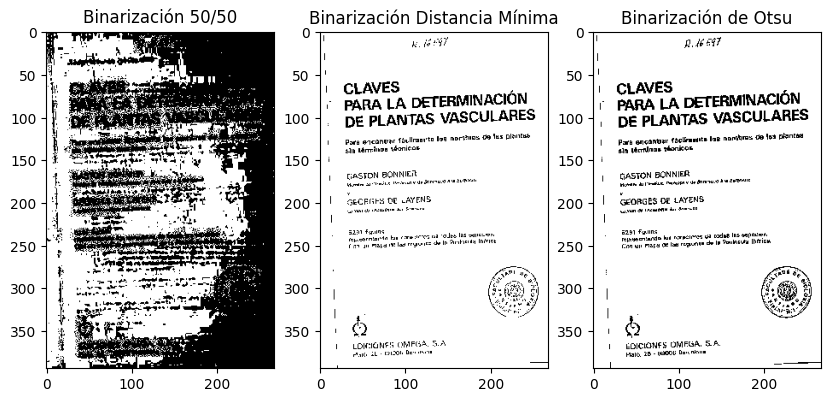

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para binarización básica 50/50
def binarizar_50_50(img):
    umbral = np.median(img)  # Calcular la mediana como umbral
    _, binaria = cv2.threshold(img, umbral, 255, cv2.THRESH_BINARY)
    return binaria

# Función para binarización por distancia mínima
def binarizar_distancia_minima(img):
    hist, bins = np.histogram(img, bins=256, range=(0, 256))
    moda_clara = np.argmax(hist[128:]) + 128  # Moda de los tonos claros
    moda_oscura = np.argmax(hist[:128])  # Moda de los tonos oscuros
    umbral = (moda_clara + moda_oscura) // 2  # Umbral por distancia mínima
    _, binaria = cv2.threshold(img, umbral, 255, cv2.THRESH_BINARY)
    return binaria

# Función para binarización de Otsu
def binarizar_otsu(img):
    _, binaria = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binaria



# Cargar imagen en escala de grises
img = cv2.imread('imagen_grises.png', cv2.IMREAD_GRAYSCALE)

# Aplicar métodos de binarización
img_50_50 = binarizar_50_50(img)
img_dist_min = binarizar_distancia_minima(img)
img_otsu = binarizar_otsu(img)

# Mostrar resultados
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_50_50, cmap='gray')
plt.title('Binarización 50/50')

plt.subplot(1, 3, 2)
plt.imshow(img_dist_min, cmap='gray')
plt.title('Binarización Distancia Mínima')

plt.subplot(1, 3, 3)
plt.imshow(img_otsu, cmap='gray')
plt.title('Binarización de Otsu')

plt.show()

2. Detección de bordes en imágenes

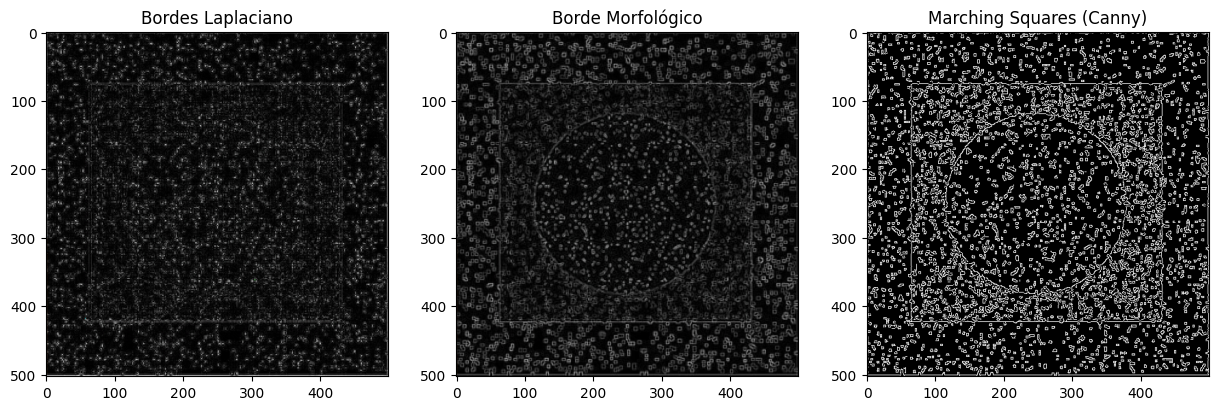

In [3]:
# Función para aplicar Laplaciano
def detectar_bordes_laplaciano(img):
    laplaciano = cv2.Laplacian(img, cv2.CV_64F)
    return np.uint8(np.absolute(laplaciano))

# Función para aplicar borde morfológico
def detectar_bordes_morfologico(img):
    kernel = np.ones((3, 3), np.uint8)
    dilatada = cv2.dilate(img, kernel, iterations=1)
    borde = dilatada - img
    return borde

# Función para Marching Squares (aplicando Canny como base)
def detectar_bordes_marching_squares(img):
    canny = cv2.Canny(img, 100, 200)  # Marching squares usando bordes detectados
    return canny


# Cargar imagen
img = cv2.imread('imagenA.png')


# Aplicar métodos de detección de bordes
bordes_laplaciano = detectar_bordes_laplaciano(img)
bordes_morfologico = detectar_bordes_morfologico(img)
bordes_marching_squares = detectar_bordes_marching_squares(img)

# Mostrar resultados
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(bordes_laplaciano, cmap='gray')
plt.title('Bordes Laplaciano')

plt.subplot(1, 3, 2)
plt.imshow(bordes_morfologico, cmap='gray')
plt.title('Borde Morfológico')

plt.subplot(1, 3, 3)
plt.imshow(bordes_marching_squares, cmap='gray')
plt.title('Marching Squares (Canny)')

plt.show()

3. Color fill con varita mágica

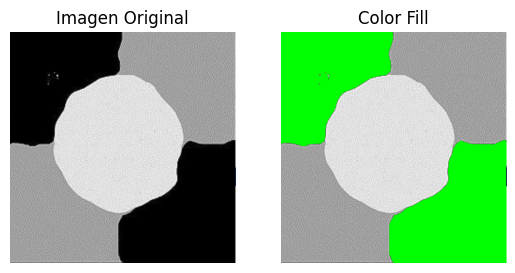

In [4]:
# Cargar la imagen
imagen = cv2.imread('imagenB.png')

# Convertir la imagen a espacio de color HSV
hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)

# Definir el color inicial en una posición (usamos la varita mágica)
color_inicial = hsv[100, 100]  # Cambiar la posición según lo que quieras segmentar
umbral = np.array([10, 50, 50])  # Definir la tolerancia al color

# Definir los rangos inferior y superior basados en la tolerancia
inferior = np.clip(color_inicial - umbral, 0, 255)
superior = np.clip(color_inicial + umbral, 0, 255)

# Crear la máscara para los píxeles similares al color inicial
mascara = cv2.inRange(hsv, inferior, superior)

# Aplicar color fill a la imagen original
imagen_coloreada = imagen.copy()
imagen_coloreada[mascara != 0] = [0, 255, 0]  # Cambiar el color a verde

# Convertir de BGR a RGB para mostrar correctamente con Matplotlib
imagen_rgb = cv2.cvtColor(imagen_coloreada, cv2.COLOR_BGR2RGB)

# Mostrar la imagen original y la imagen con color fill
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_rgb)
plt.title('Color Fill')
plt.axis('off')

# Mostrar ambas imágenes
plt.show()
